## Метод трапеций с приминением методики _Ричерсона_

    - реализовать численный подсчет интеграла методом трапеци с исполльзованием методики _Ричерсона_
    
**Входные данные:** ```U(x), a, b, N, R, S```, соответсвенно функция, подлежащая интегрированию, пределы интегрирования, количество слагаемых в сумме Дорбу, коэфициент сгущения и число сеток

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('seaborn-dark')
plt.rc('font', size=15)

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


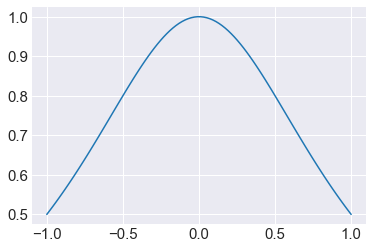

In [2]:
def funcion(x):
    return 1 / (1 + x**2)

fig = plt.figure()
X = np.linspace(-1, 1, 100)
Y = funcion(X)
plt.plot(X, Y)
plt.grid(lw=1)

### Пример вывода треугольников решения

In [3]:
def Integration(u, a, b, N):
    h = (b - a)/N
    x = linspace(a, b, N+1)
    integral = 0.
    for n in range(1, N+1):
        integral = integral + (u(x[n-1]) + u(x[n])) / 2*h 
    return integral


def PrintTriangular(mas, i, lines=None):
    if lines is None:
        lines = len(mas)
        
    for line in range(lines):
        for n in range(line + 1 - i):
            print('{0:7.4f}'.format(mas[line][n]), end=' ')
        print()

        
def SimpleRicherdson(func, a, b, S=12, p=2, q=2, N=2, r=2):
    U = np.zeros((S,S))
    R = np.zeros((S,S))
    p_eff = np.zeros((S,S))

    for s in range(S):
        U[s][0] = Integration(func, a, b, r**s*N)

    for s in range(1, S):
        for n in range(s):
            R[s][n] = (U[s][n] - U[s-1][n]) / (r**(p + n*q) - 1)
            U[s][n + 1] = U[s][n] + R[s][n]

    for s in range(2, S):
        for n in range(s - 1):
            p_eff[s][n] = log(abs(R[s-1][n]/R[s,n])) / log(r)
    
    return U, R, p_eff



res = SimpleRicherdson(funcion, a=0., b=1., S=10)
PrintTriangular(res[0], 0)
PrintTriangular(res[1], 1)
PrintTriangular(res[2], 2)

 0.7750 
 0.7828  0.7854 
 0.7847  0.7854  0.7854 
 0.7852  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 

 0.0026 
 0.0007  0.0000 
 0.0002  0.0000 -0.0000 
 0.0000  0.0000 -0.0000  0.0000 
 0.0000  0.0000 -0.0000 -0.0000 -0.0000 
 0.0000  0.0000 -0.0000 -0.0000 -0.0000  0.0000 
 0.0000  0.0000 -0.0000 -0.0000 -0.0000 -0.0000 -0.0000 
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 
 0.0000 -0.0000 -0.0000 -0.0000 -0.0000 -0.0000 -0.0000 -0.0000 -0.0000 


 1.9967 
 1.9999  7.3263 
 2.0000  5.9978  7.5906 
 2.0000  5.9998  5.9972 15.9918 
 2.0000  6.0023  5.9987  7.0362 16.0393 
 2.0000  6.6192  5.8513 -0.8074 -1.8074  4.2150 
 2.0

### Построим графики решения

Text(0, 0.5, 'Порядок точности')

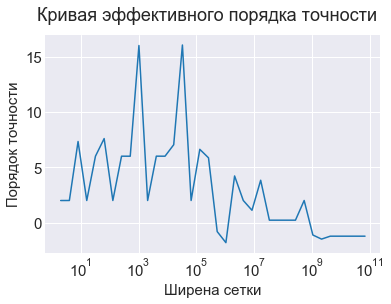

In [4]:
def get_line(mas, i, lines=None):
    if lines is None:
        lines = len(mas)
        
    ans = []
    for m in range(lines):
        for n in range(m + 1 - i):
            ans.append(mas[m][n])
    return ans


N = 2
r = 2
p_eff_line = get_line(res[2], 2)
x = [N*r**s for s in range(len(p_eff_line))]

plt.xscale('log')
plt.plot(x, p_eff_line)
plt.grid(lw=1)
plt.suptitle('Кривая эффективного порядка точности')
plt.xlabel('Ширена сетки')
plt.ylabel('Порядок точности')

Text(0, 0.5, 'Решение')

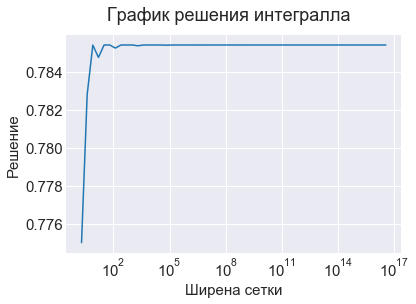

In [5]:
solve_line = get_line(res[0], 0)
x = [N*r**s for s in range(len(solve_line))]

plt.xscale('log')
plt.plot(x, solve_line)
plt.grid(lw=1)
plt.suptitle('График решения интегралла')
plt.xlabel('Ширена сетки')
plt.ylabel('Решение')

In [6]:
def RicherdsonExtrapolation(func, a, b, EPS=10, p=2, q=2, r=2, N=2, S=15):
    U = np.zeros((S,S))
    R = np.zeros((S,S))
    p_eff = np.zeros((S,S))

    s = 1
    U[0][0] = Integration(func, a, b, N)
    while True:
        U[s][0] = Integration(func, a, b, r**s*N)

        for n in range(s):
            R[s][n] = (U[s][n] - U[s-1][n]) / (r**(p + n*q) - 1)
            
            p_eff[s][n] = log(abs(R[s-1][n]/R[s][n])) / log(r)
            
            U[s][n + 1] = U[s][n] + R[s][n]
            
            if abs(R[s][n]) < (0.1)**EPS:
                return (U[s][n], R[s][n], p_eff[s][n], p*(s-1)+n*q | p, s, n, U, R, p_eff)

            
        
        s += 1
        if s > 13: 
            return (U[s-1][s-1], R[s-1][s-1], p_eff[s-1][s-3], p + s*q, s, s, U, R, p_eff)

#abs(R[s][n]) < 10**(-EPS)

ans = RicherdsonExtrapolation(funcion, a=0., b=1., EPS=22)
print('Ответ: {0:12.10f}\nПогрешность: {1:12.10f}\nЭффективный порядок точности: {2:7.10f}\nТеоретический порядок точности: {3:7.5f}'.format(ans[0], ans[1], ans[2], ans[3]), end=' ')
print('\n')
PrintTriangular(ans[-3], 0, ans[4])
PrintTriangular(ans[-2], 1, 1+ans[4])
PrintTriangular(ans[-1], 2, 2+ans[4])


Ответ: 0.7853981634
Погрешность: 0.0000000000
Эффективный порядок точности:    -inf
Теоретический порядок точности: 42.00000 

 0.7750 
 0.7828  0.7854 
 0.7847  0.7854  0.7854 
 0.7852  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 
 0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854  0.7854 

 0.0026 
 0.0007  0.0000 
 0.0002  0.0000 -0.0000 
 0.0000  0.0000 -0.0000  0.0000 
 0.0000  0.0000 -0.0000 -0.0000 -0.0000 
 0.0000  0.0000 -0.0000 -0.0000 -0.0000  0.0000 
 0.0000  0.0000 -0.0000 -0.0000 -0.0000 -0.0000 -0.0000 
 0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000 
 0.0000 -0.0000 -0.0000 -0.0000 -0.00

Text(0, 0.5, 'Решение')

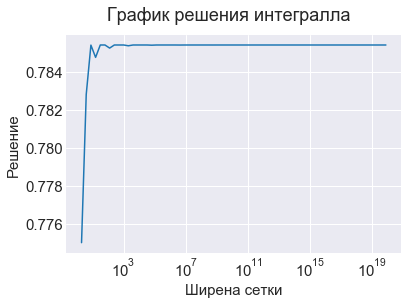

In [7]:
solve_line = get_line(ans[-3], 0, ans[4])
x = [N*r**s for s in range(len(solve_line))]

plt.xscale('log')
plt.plot(x, solve_line)
plt.grid(lw=1)
plt.suptitle('График решения интегралла')
plt.xlabel('Ширена сетки')
plt.ylabel('Решение')

Text(0, 0.5, 'Порядок точности')

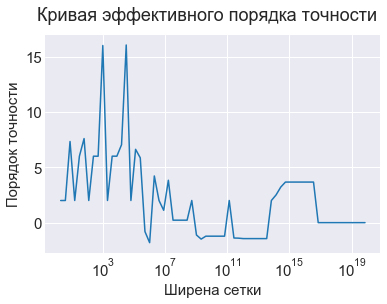

In [8]:
solve_line = get_line(ans[-1], 2, 2+ans[4])
x = [N*r**s for s in range(len(solve_line))]

plt.xscale('log')
plt.plot(x, solve_line)
plt.grid(lw=1)
plt.suptitle('Кривая эффективного порядка точности')
plt.xlabel('Ширена сетки')
plt.ylabel('Порядок точности')